In [30]:
pip install tensorflow keras opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'train'
test_dir = 'test'

train_datagen = ImageDataGenerator(
    rescale=1./255,             # Wajib: Menormalisasi piksel
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(96, 96),     # <--- UBAH UKURAN KE 96x96 (atau 128, 224, sesuai model pre-trained)
    color_mode='rgb',         # <--- UBAH KE RGB (gambar berwarna)
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(96, 96),     # <--- UBAH UKURAN KE 96x96
    color_mode='rgb',         # <--- UBAH KE RGB
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)), # Input 48x48, 1 channel (grayscale)
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Karena ada 7 emosi
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,047 (3.20 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
pip install pillow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Membuat model CNN sederhana
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    BatchNormalization(), # <--- TAMBAHKAN BARIS INI
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(), # <--- TAMBAHKAN BARIS INI
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(), # <--- TAMBAHKAN BARIS INI (opsional, tapi disarankan)
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,943 (3.20 MB)

 Trainable params: 839,495 (3.20 MB)

 Non-trainable params: 448 (1.75 KB)

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping # <--- TAMBAHKAN BARIS INI


In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directory
train_data_dir = 'train'
validation_data_dir = 'test'

# Define ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    color_mode='grayscale',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [39]:
train_dir = 'train' 
test_dir = 'test' 

In [44]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale', # Penting: grayscale
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale', # Penting: grayscale
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 28839 images belonging to 7 classes.
Found 7308 images belonging to 7 classes.


In [41]:
# ... (bagian import lainnya) ...
from tensorflow.keras.callbacks import EarlyStopping # Tambahkan ini

In [45]:
# Definisikan EarlyStopping Callback
# monitor='val_loss' berarti kita memantau nilai loss pada data validasi
# patience=10 berarti model akan menunggu 10 epoch tanpa peningkatan val_loss sebelum berhenti
# restore_best_weights=True akan mengambil bobot model dari epoch terbaik
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(
    train_data,
    epochs=100, 
    validation_data=test_data,
    callbacks=[early_stopping] 
)

print("Model training complete!")

Epoch 1/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 236s 522ms/step - accuracy: 0.3260 - loss: 1.9286 - val_accuracy: 0.2271 - val_loss: 3.7902
Epoch 2/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 211s 468ms/step - accuracy: 0.4426 - loss: 1.4583 - val_accuracy: 0.4728 - val_loss: 1.3771
Epoch 3/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 218s 482ms/step - accuracy: 0.4831 - loss: 1.3604 - val_accuracy: 0.4728 - val_loss: 1.3492
Epoch 4/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 204s 453ms/step - accuracy: 0.4999 - loss: 1.3144 - val_accuracy: 0.5047 - val_loss: 1.2980
Epoch 5/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 219s 486ms/step - accuracy: 0.5296 - loss: 1.2454 - val_accuracy: 0.4669 - val_loss: 1.4104
Epoch 6/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 200s 444ms/step - accuracy: 0.5347 - loss: 1.2211 - val_accuracy: 0.4813 - val_loss: 1.9865
Epoch 7/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 197s 436ms/step - accuracy: 0.5435 - loss: 1.2170 - val_accuracy: 0.5230 - val_loss: 1.2431
Epoch 8/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 207s 460ms/step - accuracy: 

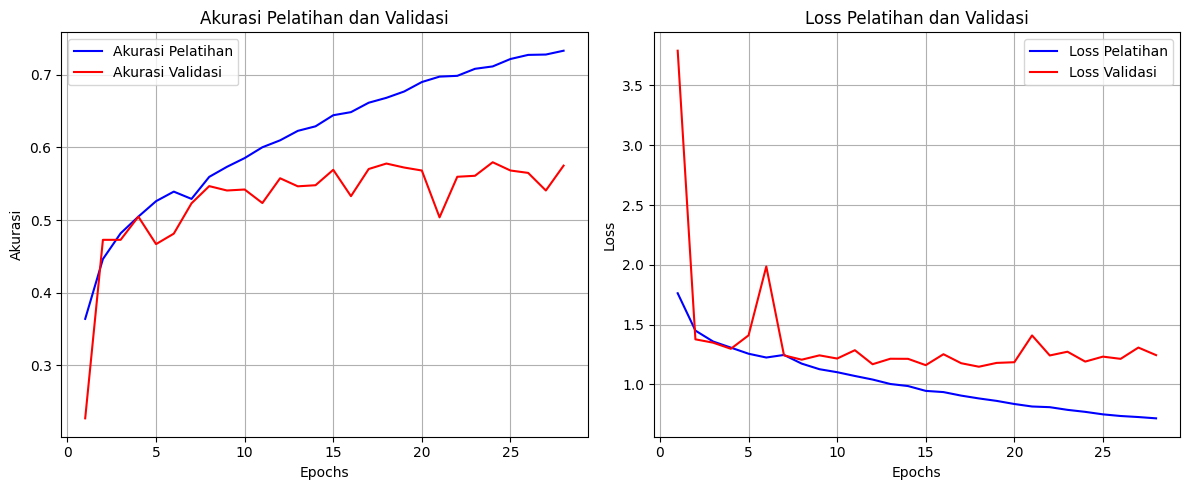

In [46]:
import matplotlib.pyplot as plt

# Mendapatkan nilai akurasi dan loss dari objek history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Mendapatkan jumlah epochs
epochs = range(1, len(train_accuracy) + 1)

# --- Plot Akurasi Pelatihan dan Validasi ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Akurasi Pelatihan')
plt.plot(epochs, val_accuracy, 'r', label='Akurasi Validasi')
plt.title('Akurasi Pelatihan dan Validasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)

# --- Plot Loss Pelatihan dan Validasi ---
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Loss Pelatihan')
plt.plot(epochs, val_loss, 'r', label='Loss Validasi')
plt.title('Loss Pelatihan dan Validasi')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [48]:
# Pastikan kode pelatihan model dan inisialisasi 'history' sudah dijalankan
# Misalnya:
# history = model.fit(
#     train_data,
# #    epochs=25,
# #    validation_data=test_data
# )

# Mengambil akurasi terakhir dari riwayat pelatihan
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print(f"Akurasi Pelatihan Akhir: {final_train_accuracy:.2%}")
print(f"Akurasi Validasi Akhir: {final_val_accuracy:.2%}")

Akurasi Pelatihan Akhir: 73.30%
Akurasi Validasi Akhir: 57.48%


In [49]:
# Asumsi 'history' sudah ada dari pelatihan model

print("\n--- Ringkasan Performa Model ---")
print(f"Jumlah Epochs Pelatihan: {len(history.history['accuracy'])}")
print(f"Akurasi Pelatihan Tertinggi: {max(history.history['accuracy']):.2%}")
print(f"Akurasi Validasi Tertinggi: {max(history.history['val_accuracy']):.2%}")
print(f"Loss Pelatihan Terendah: {min(history.history['loss']):.4f}")
print(f"Loss Validasi Terendah: {min(history.history['val_loss']):.4f}")

# Deteksi Overfitting Sederhana (Opsional)
if final_train_accuracy > final_val_accuracy * 1.10: # Contoh: jika akurasi train 10% lebih tinggi dari val
    print("\nPeringatan: Model mungkin mengalami Overfitting!")
elif final_train_accuracy < final_val_accuracy * 0.90: # Contoh: jika akurasi train 10% lebih rendah dari val
    print("\nPeringatan: Akurasi Pelatihan lebih rendah dari Validasi, periksa data atau model.")
else:
    print("\nModel tampaknya memiliki generalisasi yang baik.")


--- Ringkasan Performa Model ---
Jumlah Epochs Pelatihan: 28
Akurasi Pelatihan Tertinggi: 73.30%
Akurasi Validasi Tertinggi: 57.95%
Loss Pelatihan Terendah: 0.7165
Loss Validasi Terendah: 1.1481

Peringatan: Model mungkin mengalami Overfitting!


In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Pastikan model sudah dilatih dan test_data sudah disiapkan

# 1. Evaluasi Model pada data test_data
# Jika Anda menggunakan flow_from_directory dengan class_mode='categorical'
# Cara paling mudah untuk evaluasi adalah dengan model.evaluate()
loss, accuracy = model.evaluate(test_data)
print(f"\n--- Evaluasi Model pada Data Pengujian ---")
print(f"Loss pada Data Pengujian: {loss:.4f}")
print(f"Akurasi pada Data Pengujian: {accuracy:.2%}")

# Untuk mendapatkan metrik lebih lanjut (Classification Report, Confusion Matrix):
# Anda perlu memprediksi label untuk semua data test_data
# Ini bisa memakan waktu tergantung ukuran dataset
print("\nMenghasilkan Classification Report dan Confusion Matrix...")

# Dapatkan label sebenarnya dari test_data
# test_data.classes berisi indeks numerik kelas
true_labels = test_data.classes
# Dapatkan nama kelas yang sesuai dari generator
class_names = list(test_data.class_indices.keys())

# Reset generator untuk memastikan urutan yang sama
test_data.reset()
predictions = model.predict(test_data, steps=len(test_data)) # Menggunakan steps untuk memprediksi semua batch

# Mengambil indeks kelas dengan probabilitas tertinggi dari prediksi
predicted_labels = np.argmax(predictions, axis=1)

print("\n--- Classification Report ---")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

# Anda juga bisa memvisualisasikan Confusion Matrix untuk pemahaman yang lebih baik (Opsional)
# import seaborn as sns
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Label Prediksi')
# plt.ylabel('Label Sebenarnya')
# plt.title('Confusion Matrix')
# plt.show()

115/115 ━━━━━━━━━━━━━━━━━━━━ 40s 349ms/step - accuracy: 0.5135 - loss: 1.2909

--- Evaluasi Model pada Data Pengujian ---
Loss pada Data Pengujian: 1.1481
Akurasi pada Data Pengujian: 57.77%

Menghasilkan Classification Report dan Confusion Matrix...
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 352ms/step

--- Classification Report ---
              precision    recall  f1-score   support

       angry       0.51      0.44      0.47       982
     disgust       0.86      0.46      0.60       120
        fear       0.49      0.33      0.39      1039
       happy       0.71      0.83      0.77      1800
     neutral       0.53      0.53      0.53      1249
         sad       0.39      0.52      0.45      1266
    surprise       0.84      0.67      0.75       852

    accuracy                           0.58      7308
   macro avg       0.62      0.54      0.57      7308
weighted avg       0.59      0.58      0.57      7308


--- Confusion Matrix ---
[[ 432    4   79  114  124  217   12]
 [  25   55  

In [51]:
model.save('model_emosi_fer2013.h5')


In [52]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Muat model dan cascade face
model = load_model('model_emosi_fer2013.h5')
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Buka kamera
cap = cv2.VideoCapture(0)

# Atur ukuran video lebih kecil (misalnya 320x240) demi performa lebih cepat
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Konversi ke abu-abu dan deteksi wajah
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_gray = cv2.resize(roi_gray, (48, 48))
            roi = roi_gray.astype('float') / 255.0
            roi = np.expand_dims(roi, axis=0)
            roi = np.expand_dims(roi, axis=-1)

            prediction = model.predict(roi)[0]
            label = emotion_labels[np.argmax(prediction)]

            # Gambar kotak dan label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, label, (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        cv2.imshow('Deteksi Emosi (Ringan)', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
finally:
    cap.release()
    cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━

KeyboardInterrupt: 